# <p style="background-color:#229954 ;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Project: Customer Churn Prediction</p>

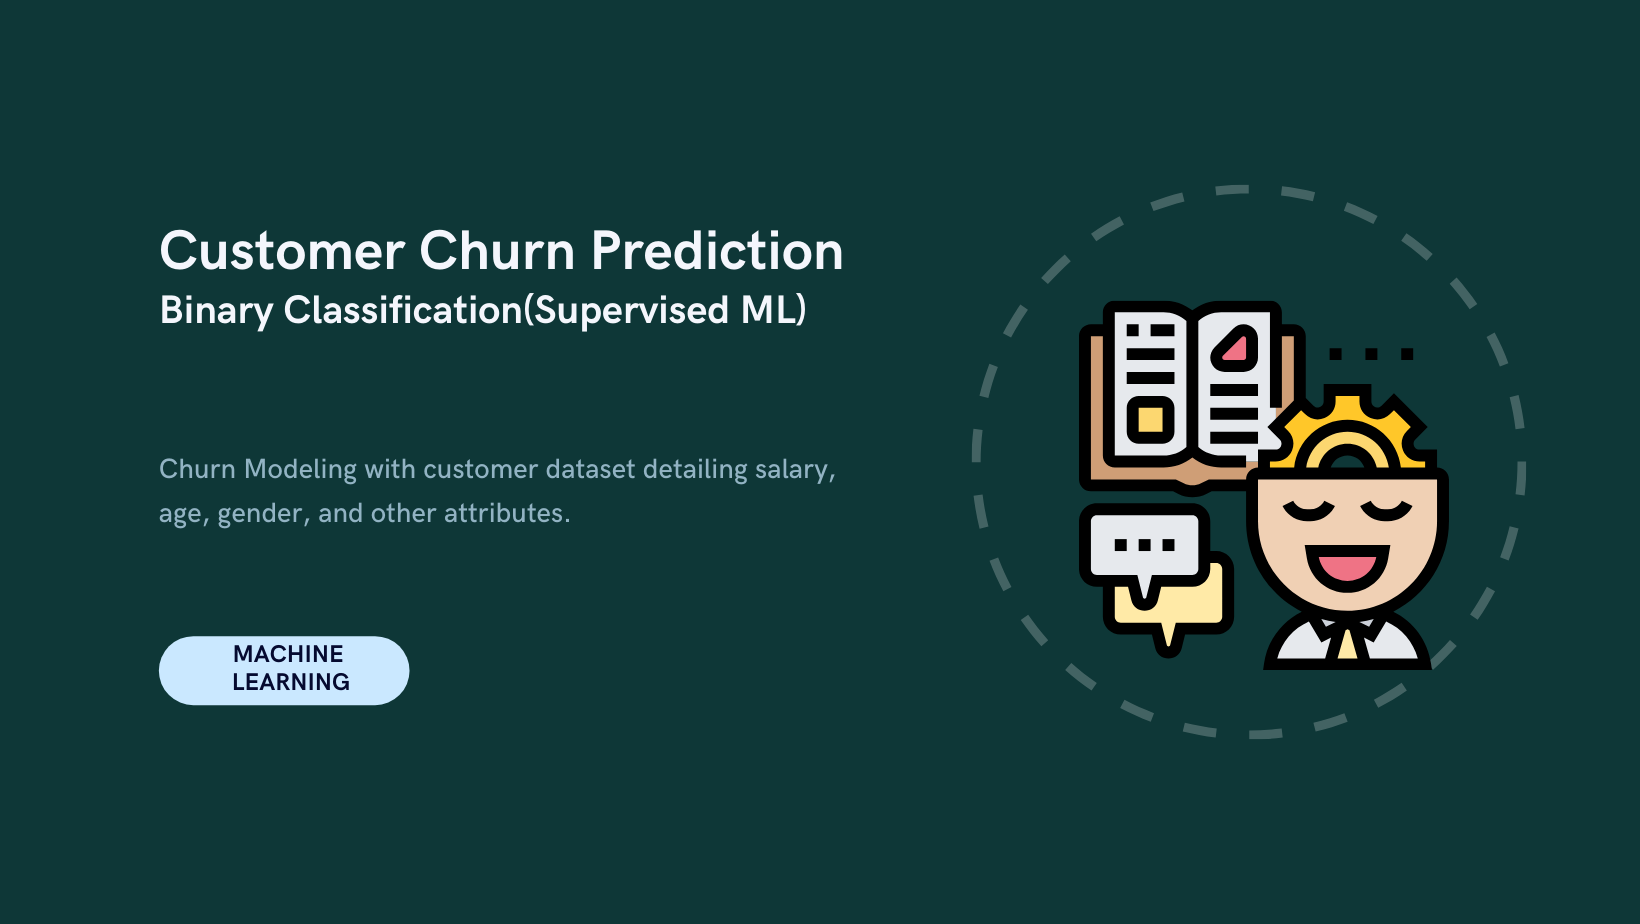

<p style="background-color:#8A4F74;font-family:'Times New Roman', serif;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Index</p>

<ul style="list-style-type:upper-roman;">
    <li><a href="#1">Import Libraries</a></li>
    <li><a href="#2">Import and Load Dataset</a></li>
    <li><a href="#3">Exploratory Data Analysis (EDA)</a>
        <ul style="list-style-type:disc; margin-left:20px;">
            <li><a href="#a">Data Visualization</a></li>
        </ul>
    </li>
    <li><a href="#4">Data Preprocessing</a></li>
    <li><a href="#5">Define Model Function and Build Model</a></li>
    <li><a href="#6">Classification Model Comparison</a></li>
    <li><a href="#7">Hyperparameter Tuning with Best Model (RandomForestClassifier)</a></li>
    <li><a href="#8">Hyperparameter Tuning with RandomSearchCV</a></li>
    <li><a href="#9">Hyperparameter Tuning with GridSearchCV</a></li>
    <li><a href="#10">Summary</a></li>
    <li><a href="#11">Save and Load Model</a></li>
</ul>


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Import Libaries</p>

In [4]:
# Importing essential libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # For advanced data visualization based on matplotlib

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')  # To avoid deprecated warning messages

# Importing preprocessing and model selection tools
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels to numerical values
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
#Data Normalization
from sklearn.preprocessing import StandardScaler
# Imbalance Data balancing
from imblearn.over_sampling import SMOTE
# List of different classifiers for machine learning
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.svm import SVC  # Support Vector Classifier
import xgboost as xgb  # Extreme Gradient Boosting classifier

# Importing metrics for evaluating model performance
from sklearn import metrics  # General metrics module
from sklearn.metrics import (accuracy_score, auc, confusion_matrix, 
                             roc_auc_score, roc_curve, recall_score)  # Specific metrics

# Importing tools for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # For random and grid search


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Import and Load Dataset</p>


In [3]:
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
df.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


 <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Exploratory Data Analysis (EDA)</p>


In [4]:
#shape
print(f'shape of dataset: {df.shape}')
print(f'dataset information: {df.info()}')

shape of dataset: (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
dataset information: None


In [5]:
#missing data
df.isnull().sum().sort_values(ascending = True)
missing_value=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([missing_value,percent],axis=1,keys=['missing','percent'])
missing_data.head(40)

,missing,percent
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


<h3> ❄️ descriptive statistics of dataframe </h3>

In [6]:
# Printing outputs in formatted strings

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Number of unique values
print("\nNumber of Unique Values in Each Column:")
print(df.nunique())

# Column names
print("\nColumn Names:")
print(df.columns.tolist())

# Imbalance in target variable
print("\nTarget Variable Balance:")
print(df['Exited'].value_counts())


Descriptive Statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
m

# 📷 Data Visualization

In [9]:
#colomn details
print(f'Column details: {df.columns}')


Column details: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


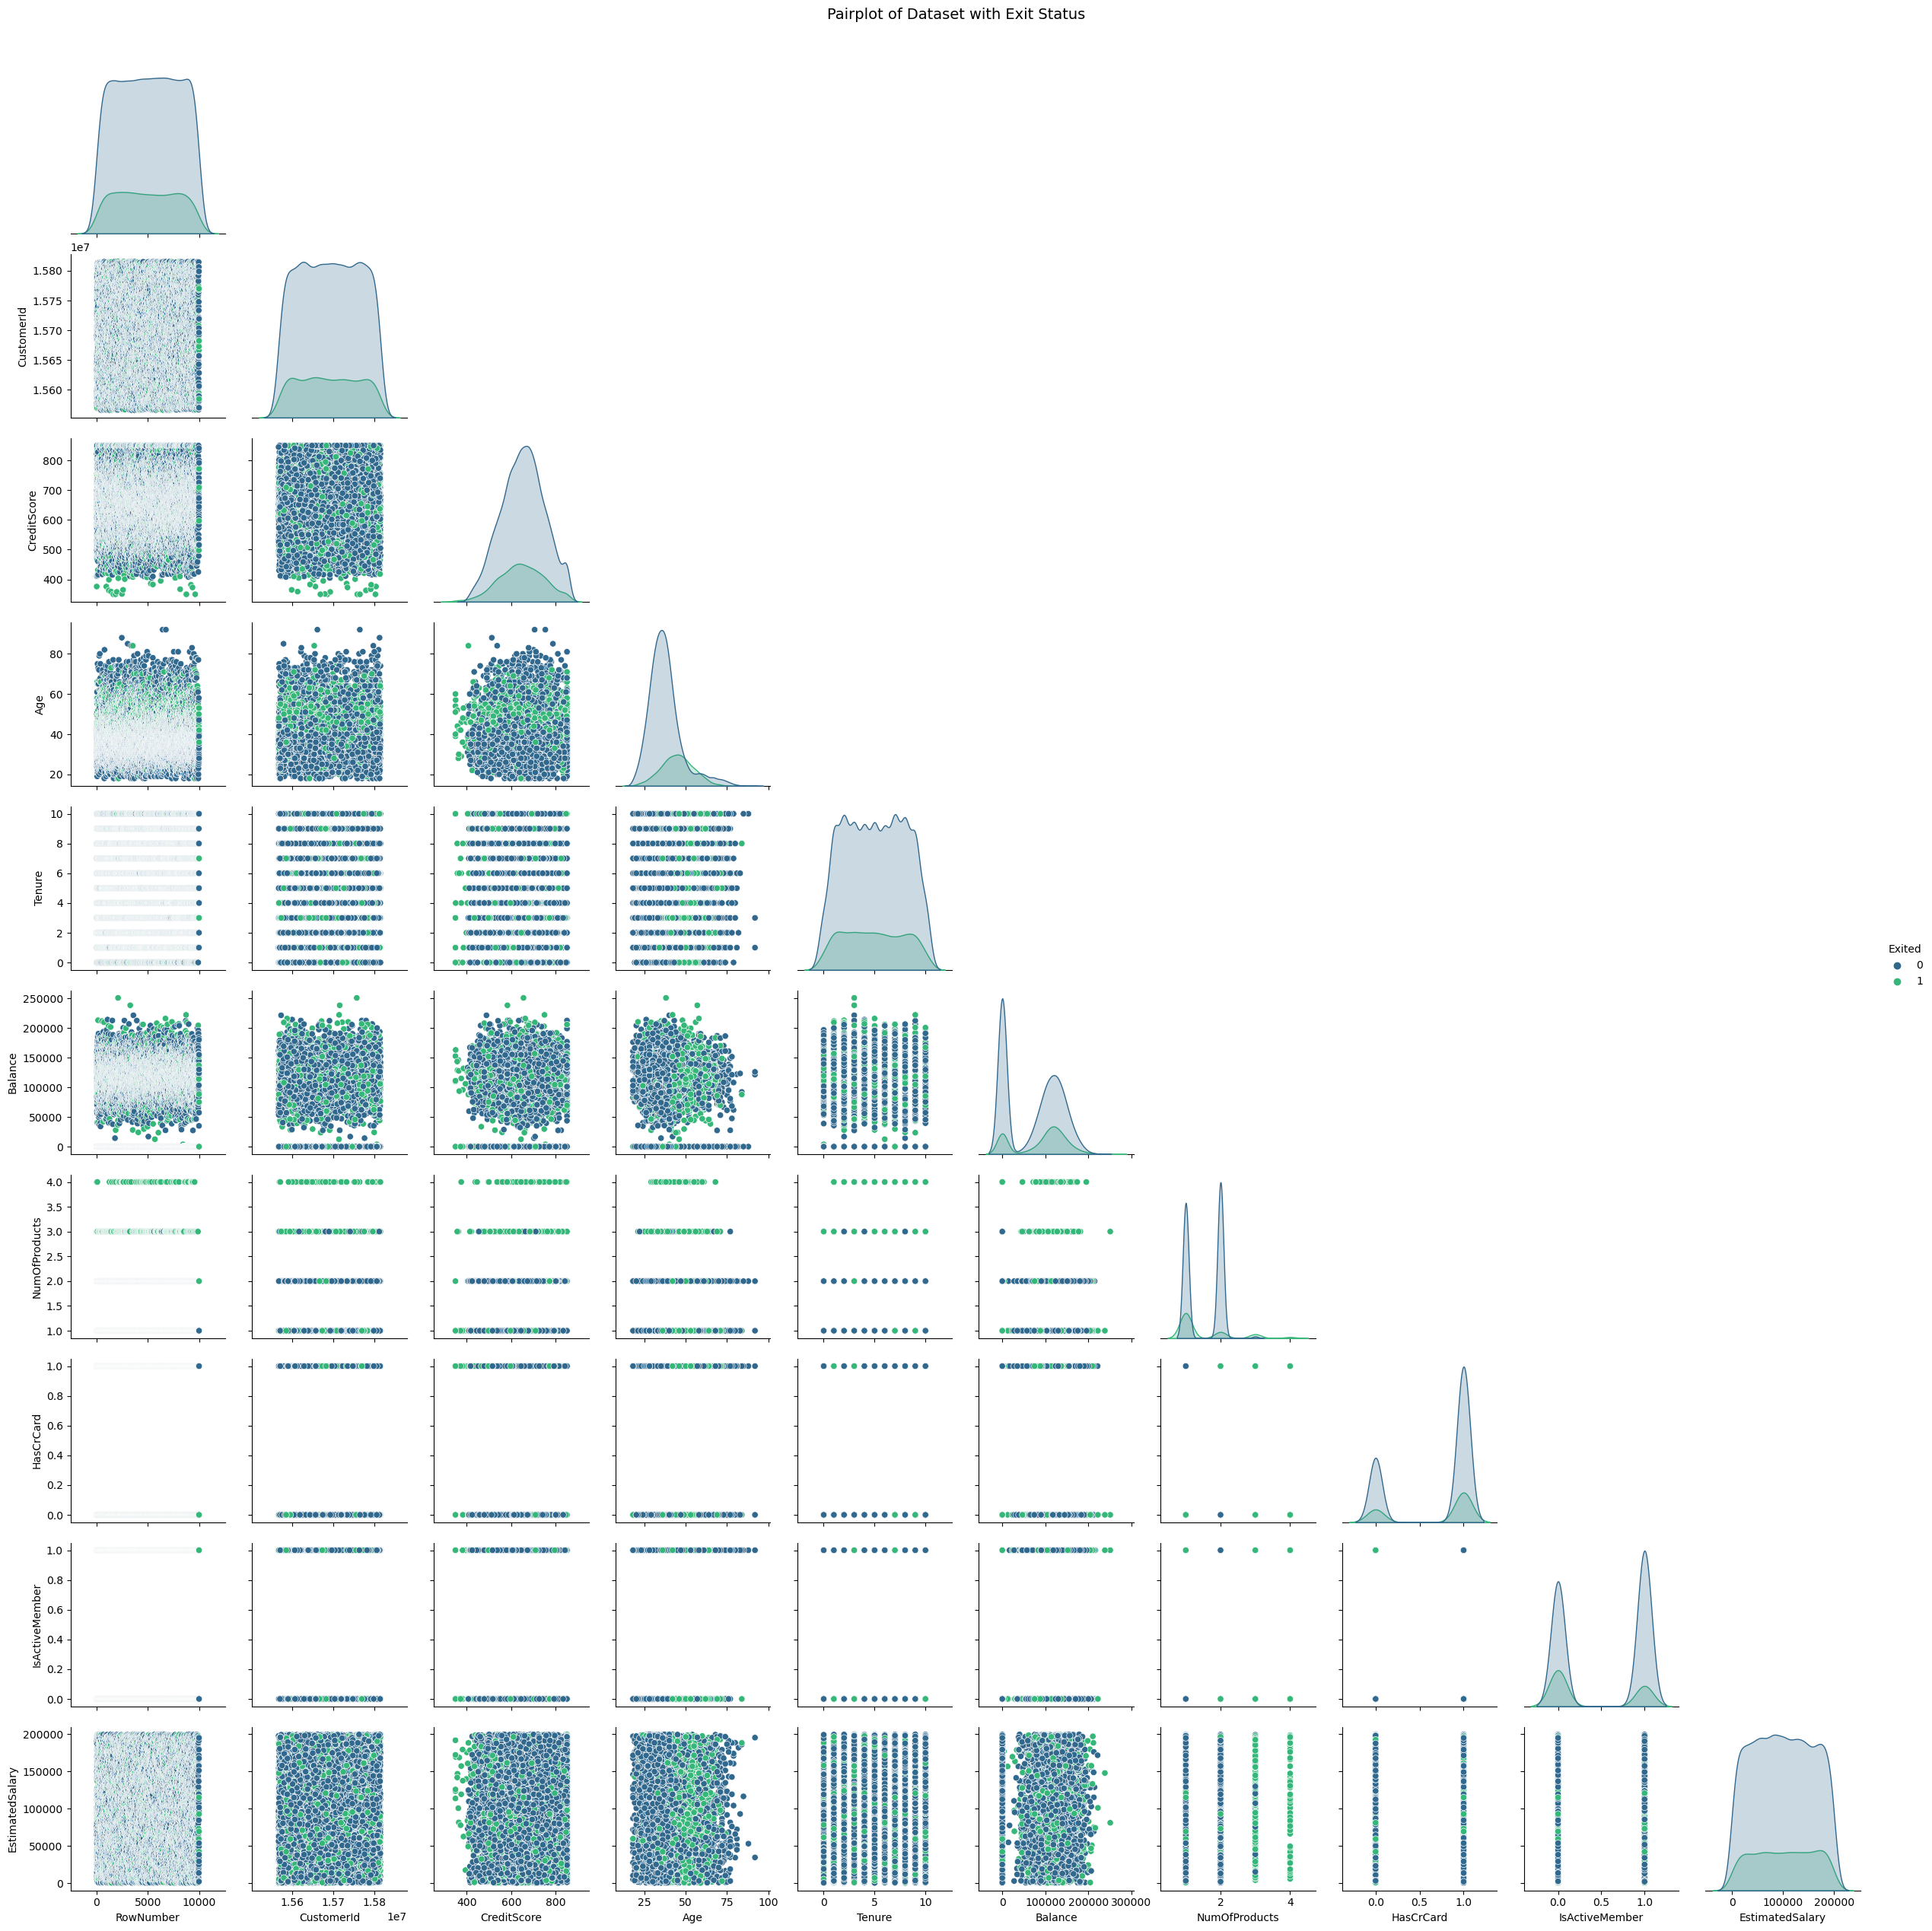

In [10]:
# Pairplot
sns.pairplot(data=df, hue='Exited', palette='viridis', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Dataset with Exit Status", y=1.02, fontsize=14)
plt.show()


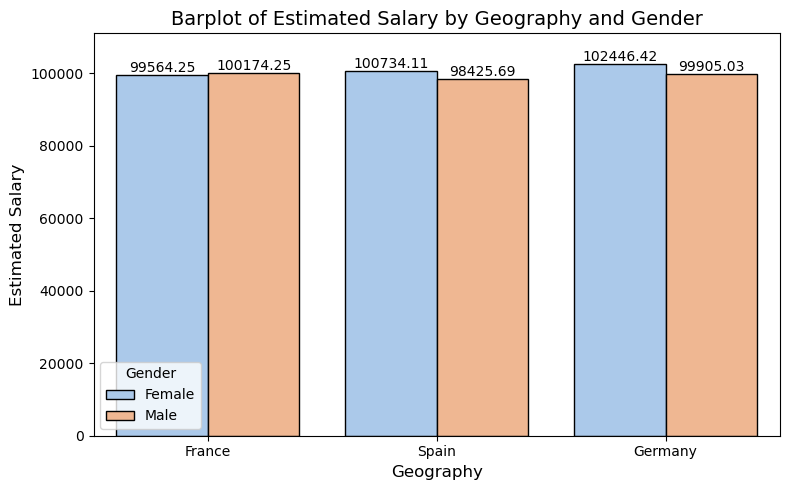

In [11]:
# Geography vs EstimatedSalary
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df, x='Geography', y='EstimatedSalary', hue='Gender', palette='pastel', edgecolor='black', errwidth=0)

# Adding value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)

plt.title("Barplot of Estimated Salary by Geography and Gender", fontsize=14)
plt.xlabel("Geography", fontsize=12)
plt.ylabel("Estimated Salary", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

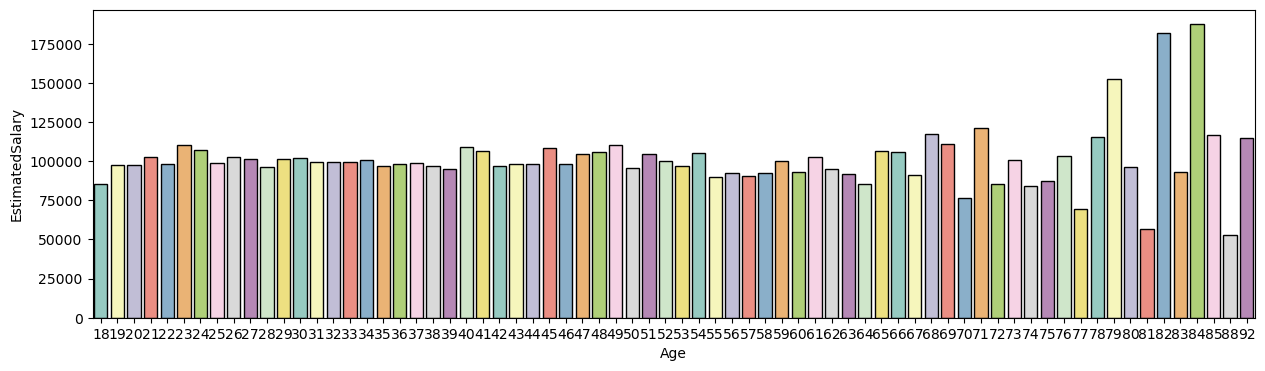

In [23]:
# Age vs EstimatedSalary
plt.figure(figsize = (15, 4))
sns.barplot(data = df, x = 'Age', y = 'EstimatedSalary', errorbar = None, palette = 'Set3', edgecolor="black")

<AxesSubplot:xlabel='Age', ylabel='count'>

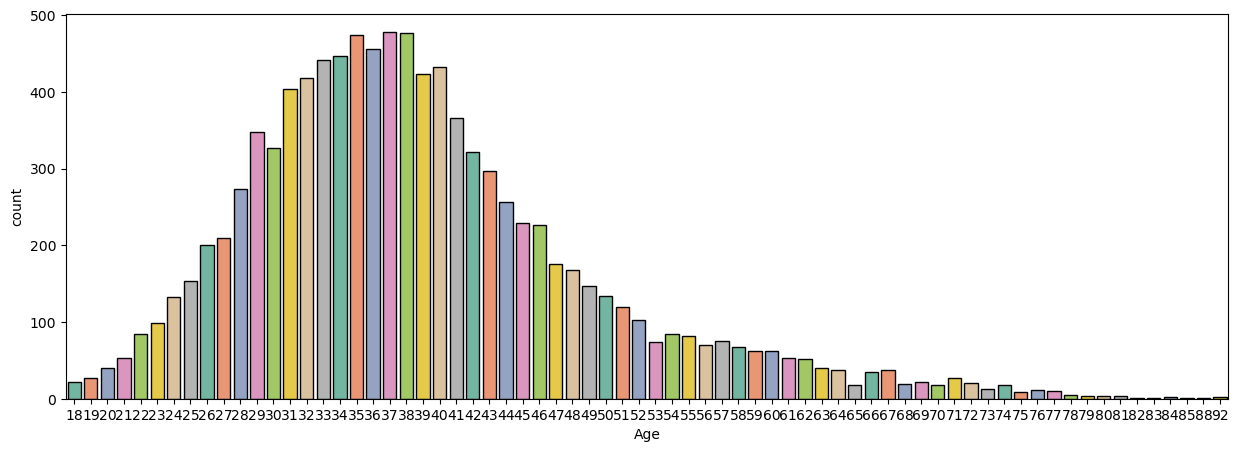

In [24]:
#Age
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'Age', palette = 'Set2', edgecolor="black")

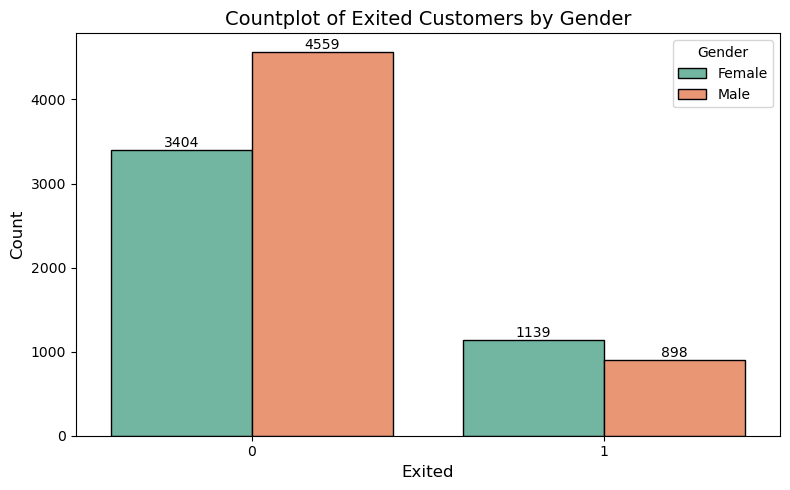

In [14]:
# Exited vs Gender
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Exited', hue='Gender', palette='Set2', edgecolor='black')

# Adding value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

plt.title("Countplot of Exited Customers by Gender", fontsize=14)
plt.xlabel("Exited", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

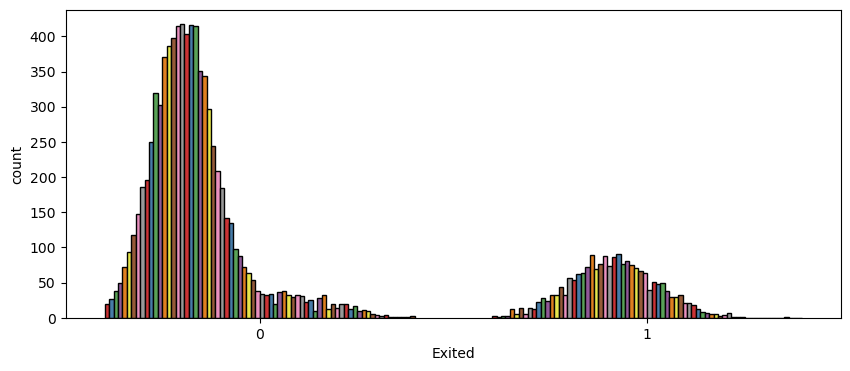

In [22]:
#Exited count based on age
plt.figure(figsize = (10,4))
g=sns.countplot(data = df, x = 'Exited', hue = 'Age', palette = 'Set1', edgecolor="black")

g.legend_.remove()

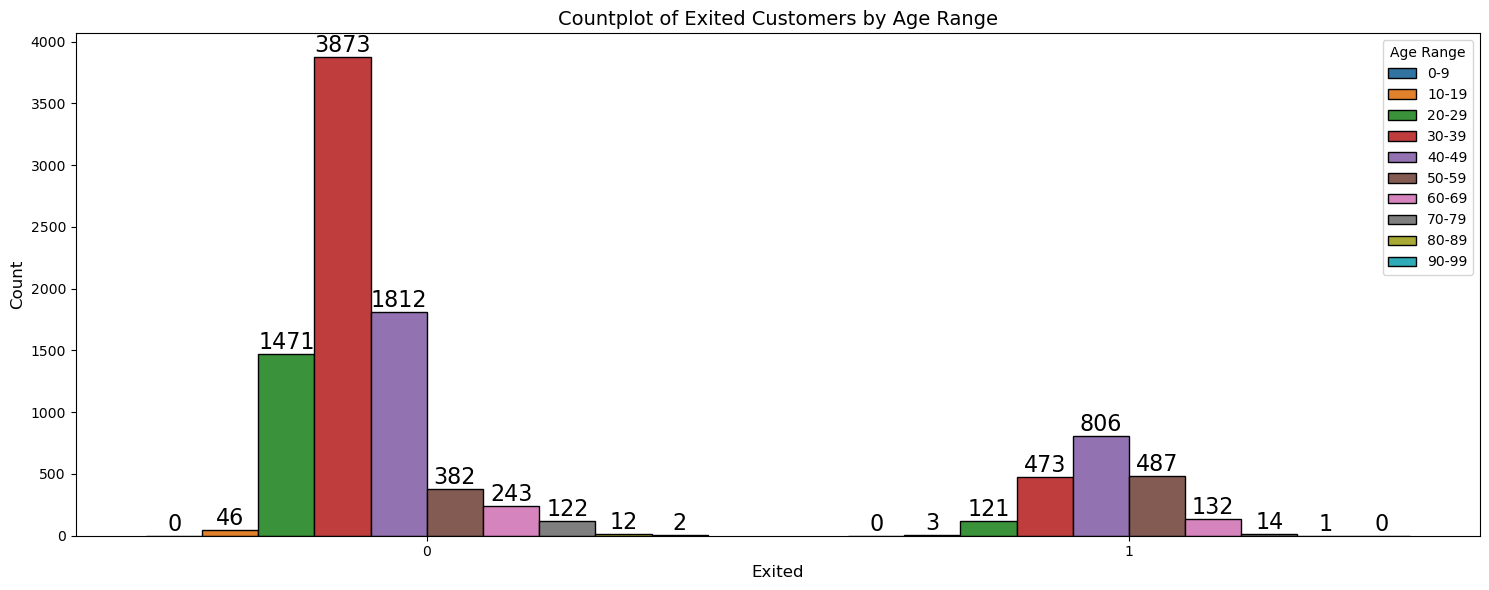

In [19]:
#New DataFrame
df1 = df.copy()
# Define age groups and categorize
age_bins = list(range(0, 101, 10))
age_labels = [f"{age}-{age+9}" for age in age_bins[:-1]]

df1['Age_Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)

# Countplot with value labels
plt.figure(figsize=(15, 6))
ax = sns.countplot(x="Exited", hue="Age_Group", data=df1, edgecolor="black")
plt.title("Countplot of Exited Customers by Age Range", fontsize=14)
plt.xlabel("Exited", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Age Range")

# Adding value labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=16)

plt.tight_layout()
plt.show()


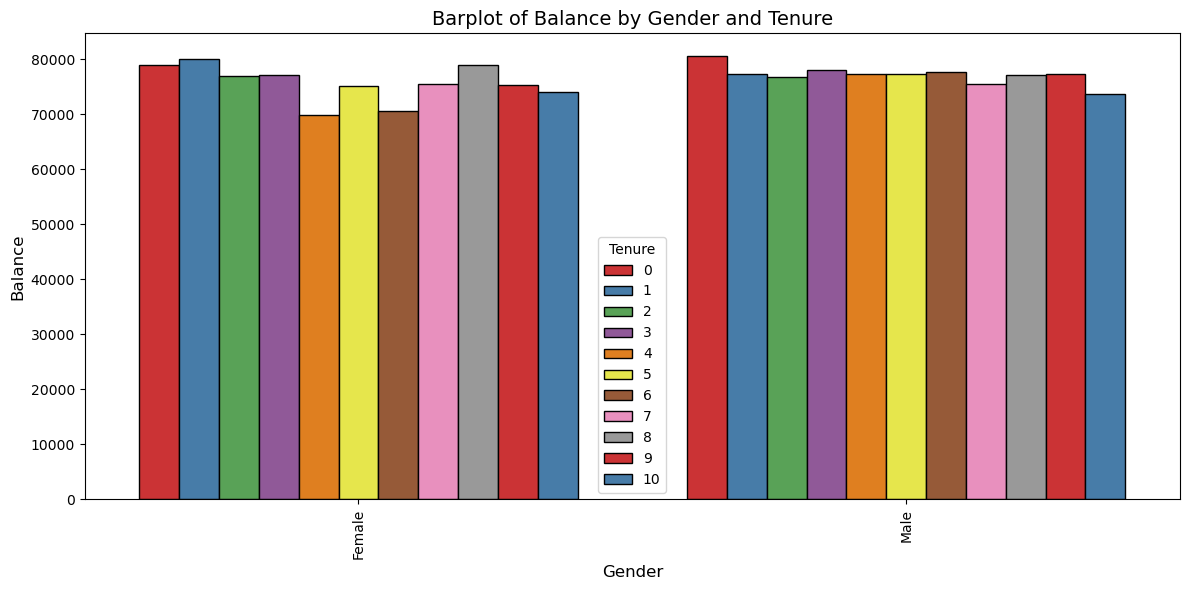

In [21]:
# Gender vs Balance
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Gender', y='Balance', hue='Tenure', palette='Set1', edgecolor="black", ci=None)

# Customizing x-axis labels and title
plt.xticks(rotation=90)
plt.title("Barplot of Balance by Gender and Tenure", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Balance", fontsize=12)
plt.tight_layout()

plt.show()

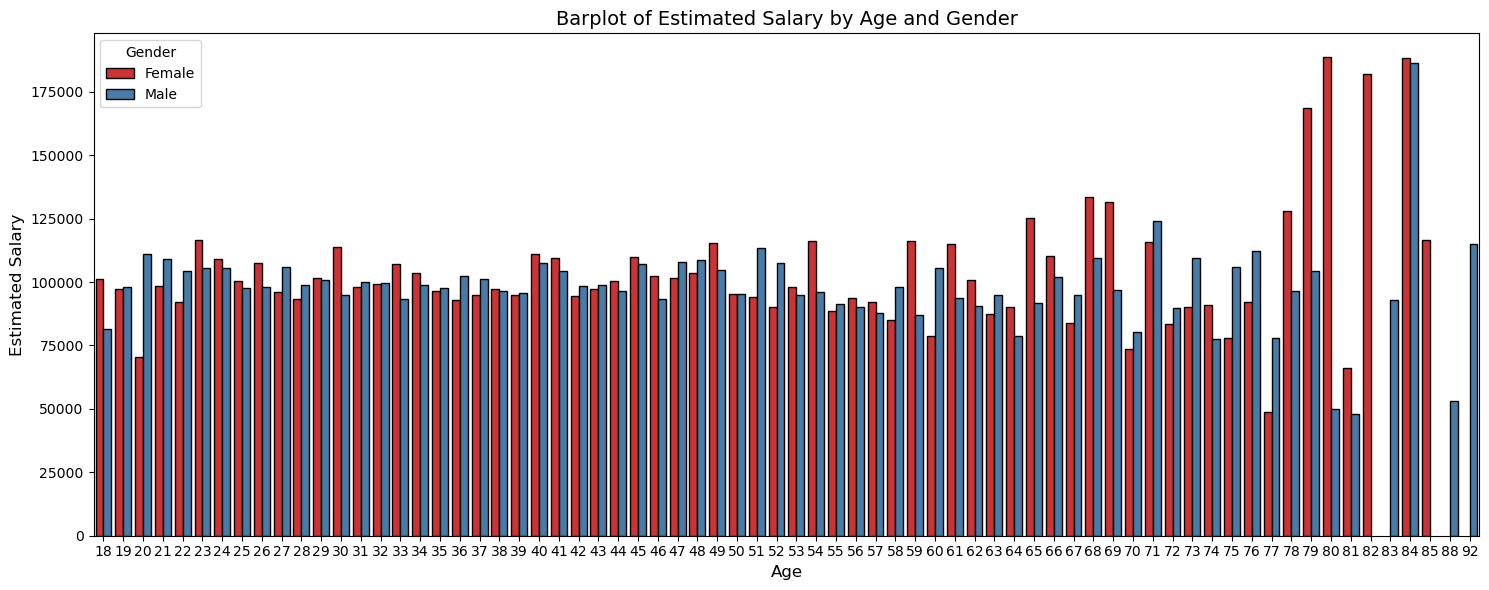

In [26]:
#Age vs EstimatedSalary
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Age', y='EstimatedSalary', hue='Gender', palette='Set1', edgecolor="black", ci=None)
plt.title("Barplot of Estimated Salary by Age and Gender", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Estimated Salary", fontsize=12)
plt.tight_layout()
plt.show()

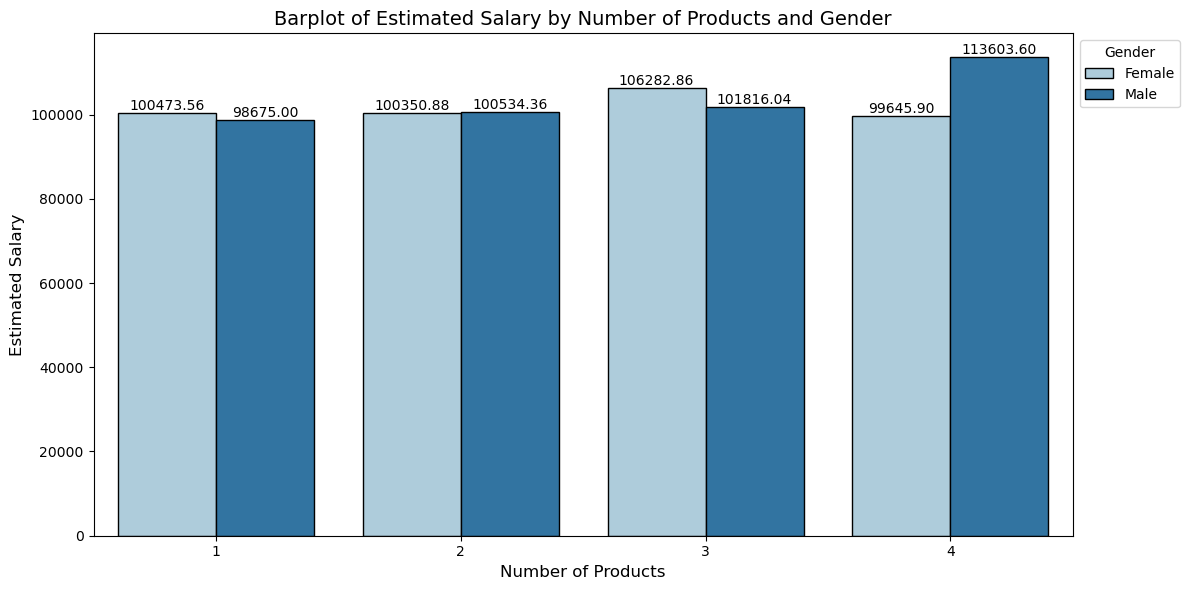

In [27]:
# NumOfProducts vs EstimatedSalary with value labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='NumOfProducts', y='EstimatedSalary', hue='Gender', palette='Paired', ci=None, edgecolor="black")
plt.title("Barplot of Estimated Salary by Number of Products and Gender", fontsize=14)
plt.xlabel("Number of Products", fontsize=12)
plt.ylabel("Estimated Salary", fontsize=12)

# Adding value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)

# Adjusting legend position
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

plt.tight_layout()
plt.show()

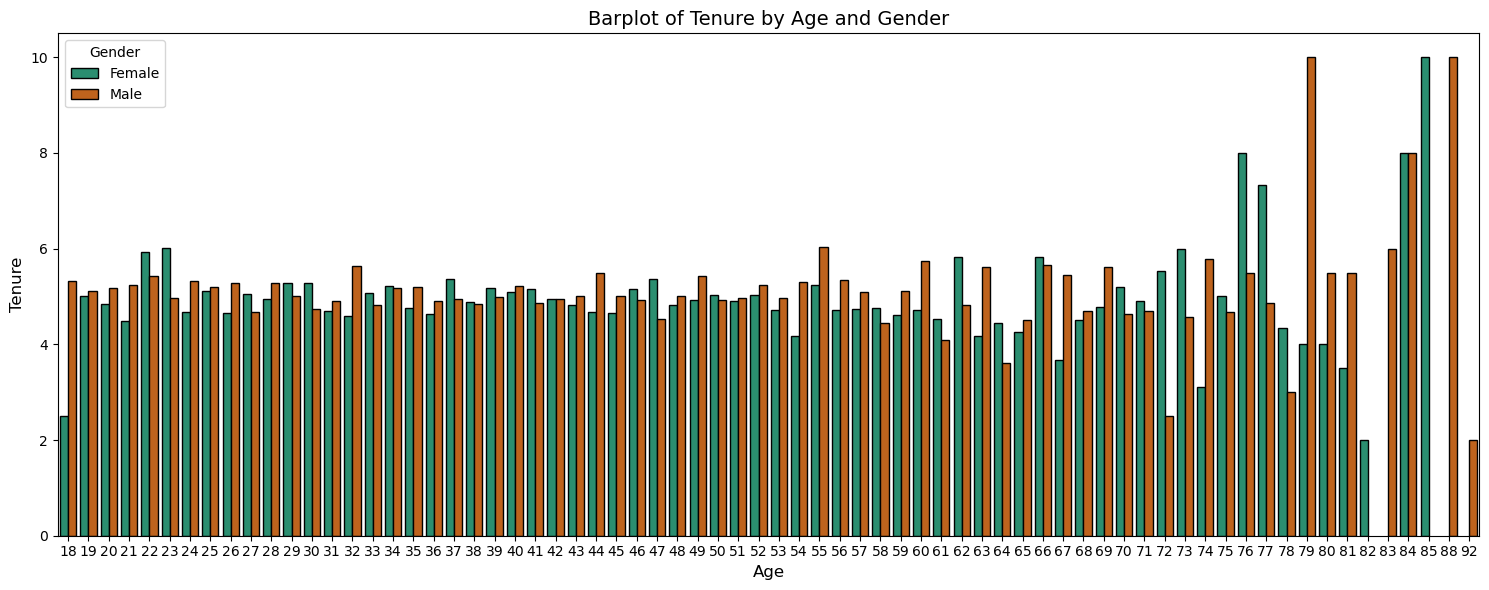

In [31]:
# Age vs Tenure
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Age', y='Tenure', hue='Gender', palette='Dark2', ci=None, edgecolor="black")
plt.title("Barplot of Tenure by Age and Gender", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Tenure", fontsize=12)
plt.tight_layout()
plt.show()


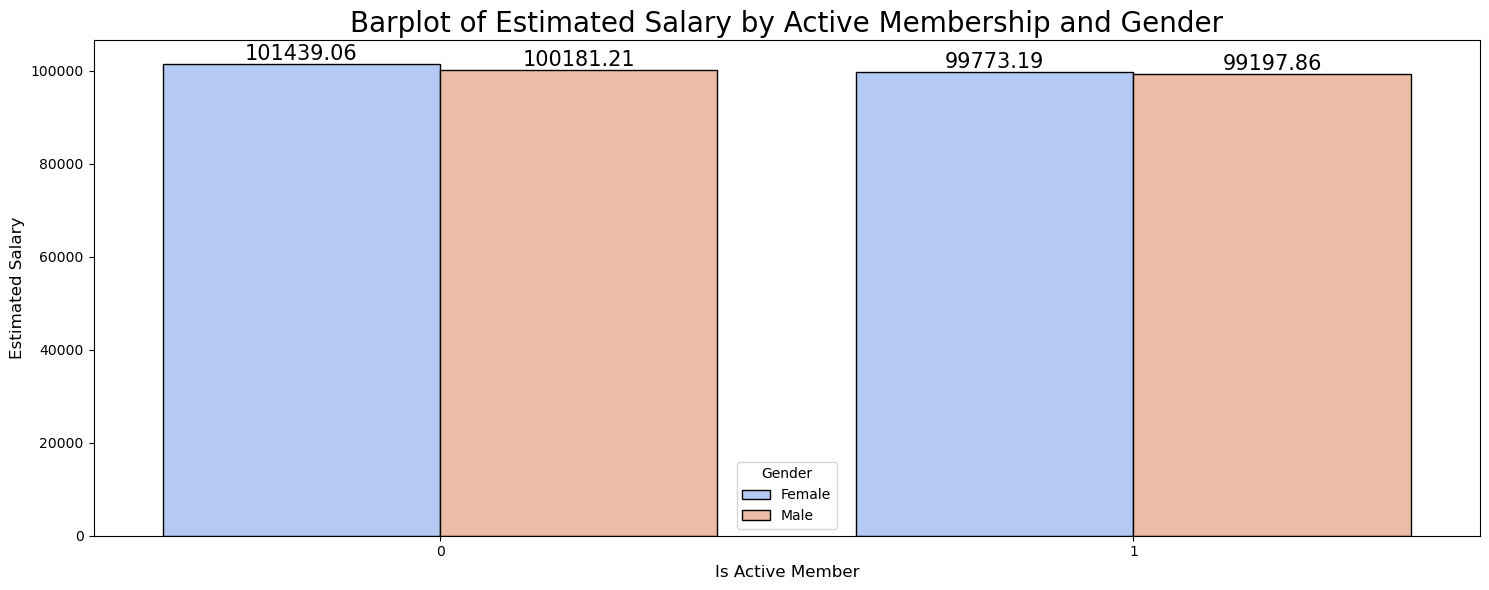

In [34]:
# IsActiveMember vs EstimatedSalary
plt.figure(figsize=(15, 6))
ax = sns.barplot(
    data=df,
    x='IsActiveMember',
    y='EstimatedSalary',
    hue='Gender',
    palette='coolwarm',  # New color palette
    ci=None,  # Disable error bars
    edgecolor="black"  # Add edge color to bars
)
plt.title("Barplot of Estimated Salary by Active Membership and Gender", fontsize=20)
plt.xlabel("Is Active Member", fontsize=12)
plt.ylabel("Estimated Salary", fontsize=12)
plt.legend(title="Gender", fontsize=10)

# Adding value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=15)

plt.tight_layout()
plt.show()

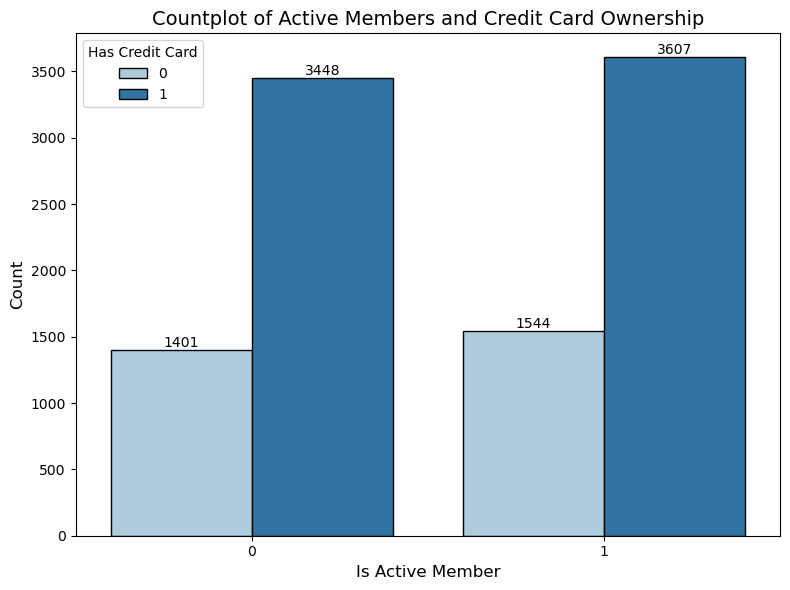

In [35]:
# IsActiveMember vs HasCrCard
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df,
    x='IsActiveMember',
    hue='HasCrCard',
    palette='Paired',  # Paired color palette
    edgecolor="black",  # Black edges around bars
)
plt.title("Countplot of Active Members and Credit Card Ownership", fontsize=14)
plt.xlabel("Is Active Member", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Has Credit Card", fontsize=10)

# Adding value labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

plt.tight_layout()
plt.show()


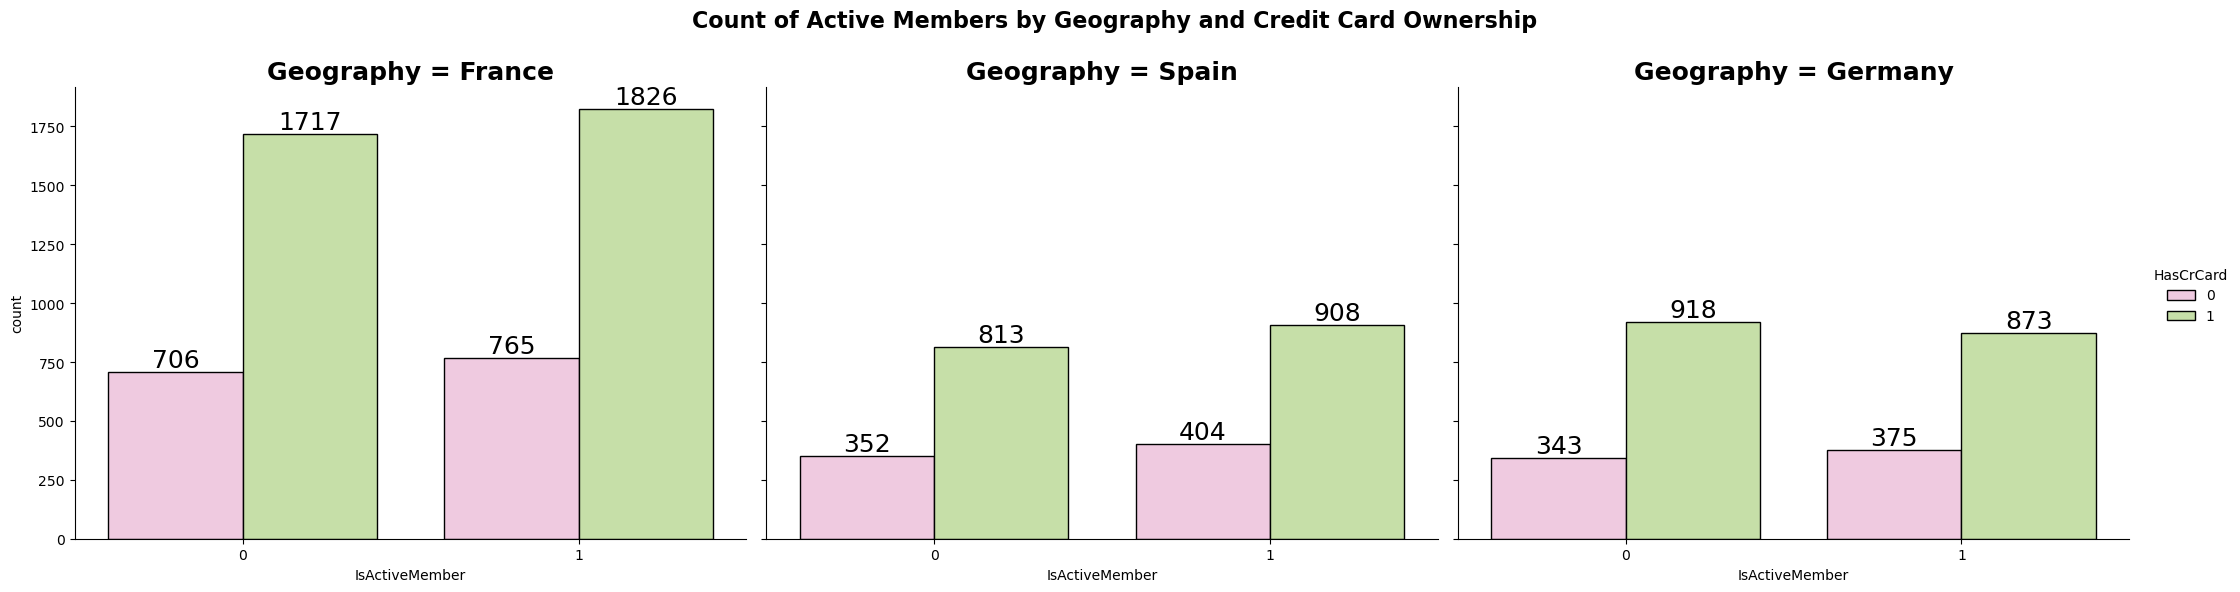

In [40]:

# IsActiveMember vs HasCrCard based on Geography
g = sns.catplot(
    data=df,
    x="IsActiveMember",
    hue="HasCrCard",
    col="Geography",
    kind="count",
    palette="PiYG",  # Custom color palette
    height=6,
    aspect=1.2,
    edgecolor="black"
)

# Add value labels on top of the bars
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=18)

# Adjust subplot titles and make them bigger
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=18, weight='bold')

# Adjust the layout
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Count of Active Members by Geography and Credit Card Ownership", fontsize=16, weight='bold')

plt.show()


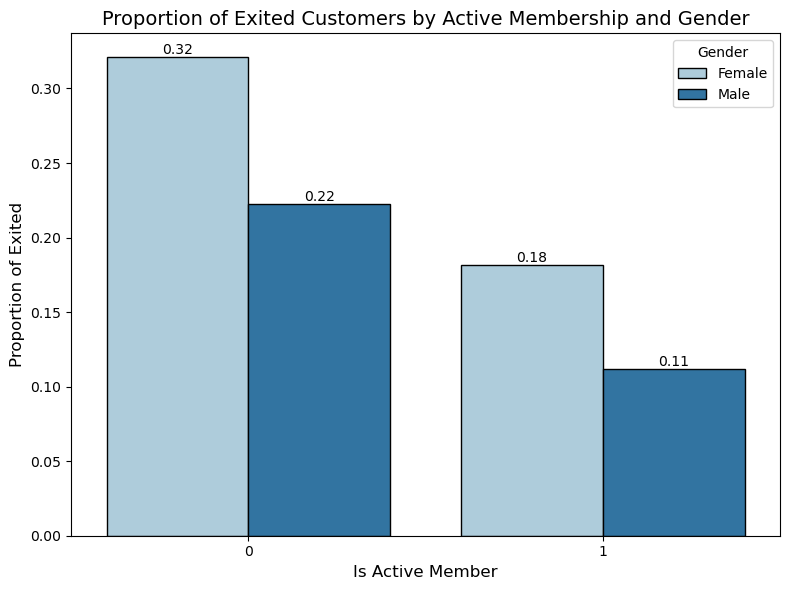

In [42]:
# IsActiveMember vs Exited
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df,
    x='IsActiveMember',
    y='Exited',
    hue='Gender',
    palette='Paired',
    ci=None,  # Disable error bars
    edgecolor="black",  # Add black edges
)
plt.title("Proportion of Exited Customers by Active Membership and Gender", fontsize=14)
plt.xlabel("Is Active Member", fontsize=12)
plt.ylabel("Proportion of Exited", fontsize=12)
plt.legend(title="Gender", fontsize=10)

# Adding value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)

plt.tight_layout()
plt.show()


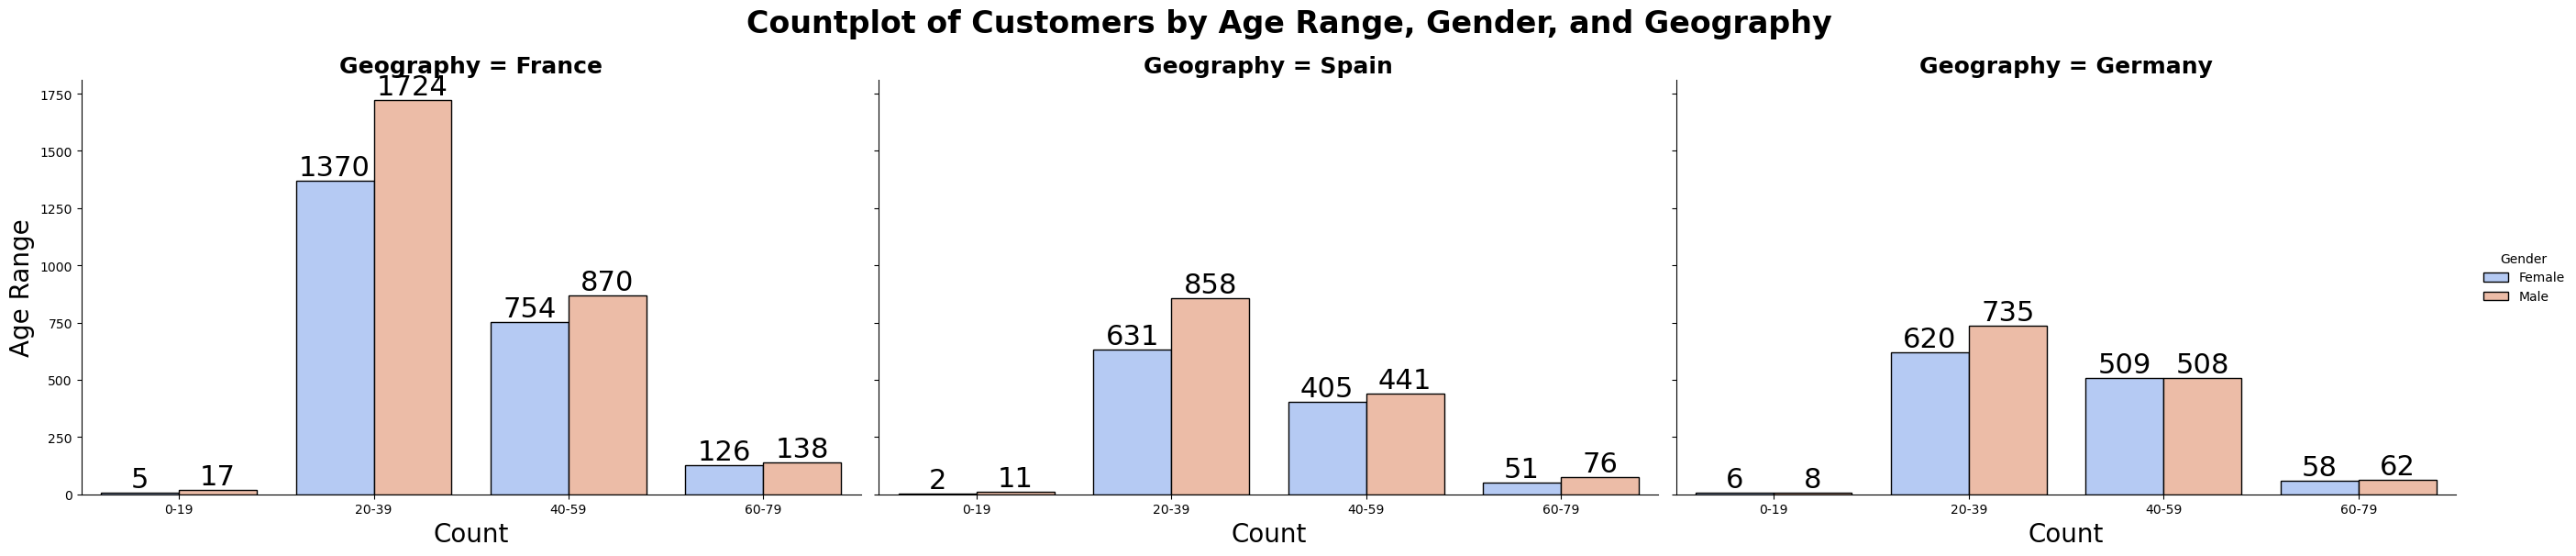

In [49]:
# Create a copy of the original DataFrame
df2 = df.copy()

# Define age ranges and labels
age_bins = list(range(0, 100, 20))  # Define bins for age in 20-year intervals
age_labels = [f"{age}-{age+19}" for age in age_bins[:-1]]  # Generate labels like "0-19", "20-39", ...
df2['Age_Range'] = pd.cut(df2['Age'], bins=age_bins, labels=age_labels, right=False)  # Categorize ages

# Create a count plot faceted by Geography
g = sns.catplot(
    data=df2,
    x="Age_Range",  # Plot Age Range on the x-axis
    hue="Gender",  # Differentiate by Gender
    col="Geography",  # Facet by Geography
    kind="count",  # Count plot
    palette="coolwarm",  # Color palette
    height=6,  # Height of each subplot
    aspect=1.5,  # Aspect ratio of each subplot
    edgecolor="black"  # Add a border to the bars
)

# Set the title for the overall figure
g.fig.subplots_adjust(top=0.85)  # Adjust spacing above the plots
g.fig.suptitle("Countplot of Customers by Age Range, Gender, and Geography", fontsize=24, weight='bold')

# Bold the titles of individual subplots
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=18, weight='bold')  # Bold and adjust font size for subplot titles

# Add labels to bars in each subplot
for ax in g.axes.flat:
    for container in ax.containers:
        # Add labels to bars only if the value is greater than 0
        labels = [f"{int(value)}" if value > 0 else "" for value in container.datavalues]
        ax.bar_label(container, labels=labels, fontsize=22)

# Customize axis labels and legend font sizes
for ax in g.axes.flat:
    ax.set_xlabel("Count", fontsize=20)  # Set x-axis label and font size
    ax.set_ylabel("Age Range", fontsize=20)  # Set y-axis label and font size


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Data Preprocessing</p>

In [7]:
# Print DataFrame info
print("\nDataFrame Info:")
df.info()
# Print column names
print("Columns in the DataFrame:")
print(df.columns)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
Columns in the DataFrame:
Index(['RowNumber', 'CustomerId', 'Surname', 'Credi

<h3> 🌀 String to Numerical </h3>

In [8]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [10]:
# Create a copy of the original DataFrame
df3 = df.copy()

# Initialize LabelEncoder for encoding categorical columns
le = LabelEncoder()

# Apply LabelEncoder to 'Geography' and 'Gender' columns to convert categorical data into numeric labels
df3[['Geography','Gender']] = df3[['Geography','Gender']].apply(le.fit_transform)   

# Drop unnecessary columns: 'RowNumber', 'CustomerId', 'Surname'
df3.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Print the shape of the DataFrame (rows, columns)
print("Shape of df3:", df3.shape)

# Print the first 3 rows of the DataFrame
print("\nFirst 3 rows of df3:")
df3.head(3)


Shape of df3: (10000, 11)

First 3 rows of df3:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


<h3> ⛄ Distribution Plot </h3> 

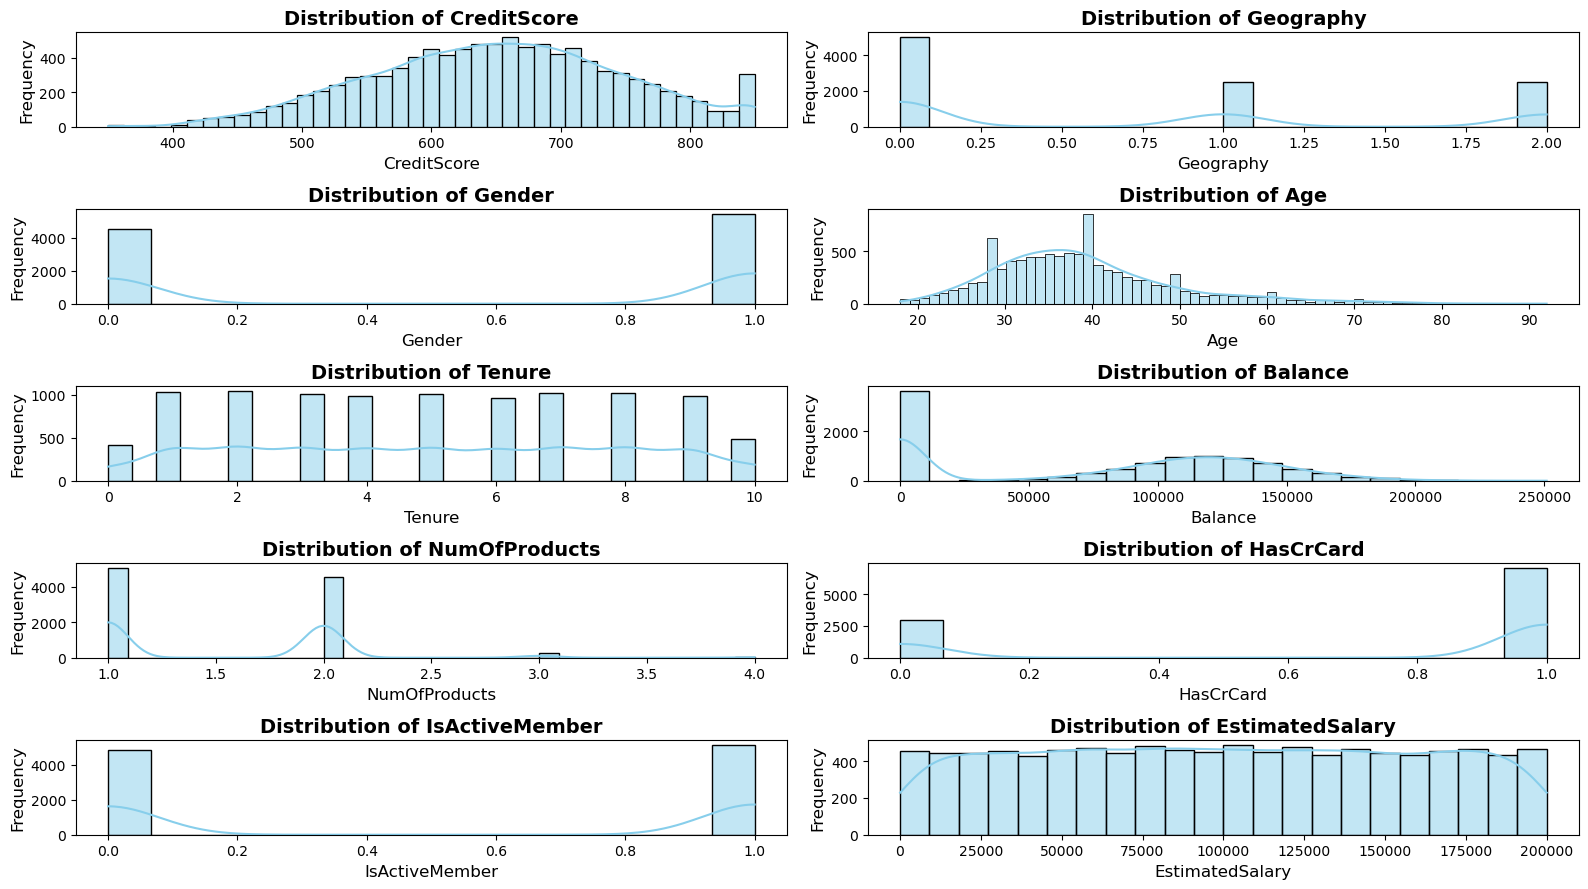

In [11]:
# Number of rows and columns for the subplots grid
rows = 5
cols = 2

# Create a figure and axes for the subplots
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 9))  # Adjusted figsize for better spacing

# List of columns in the DataFrame
col = df3.columns
index = 0

# Loop through each subplot and plot the distribution of each column
for i in range(rows):
    for j in range(cols):
        if index < len(col):  # Ensure index doesn't exceed the number of columns
            sns.histplot(df3[col[index]], kde=True, ax=ax[i][j], color='skyblue', edgecolor='black')  # Improved plot with KDE
            ax[i][j].set_title(f'Distribution of {col[index]}', fontsize=14, weight='bold')  # Title with bold font
            ax[i][j].set_xlabel(col[index], fontsize=12)  # X-axis label with larger font
            ax[i][j].set_ylabel('Frequency', fontsize=12)  # Y-axis label with larger font
            ax[i][j].tick_params(axis='both', which='major', labelsize=10)  # Adjust tick labels size
            index += 1

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


<h3> 🐺Features and Targets</h3>

In [13]:
#Featurs
X = df3.copy()
X.drop(['Exited'], axis =1, inplace = True)
#X
print('shape of features X{}'.format(X.shape))

#Targets
y = df3['Exited']
#y
print('shape of target y{}'.format(y.shape))

shape of features X(10000, 10)
shape of target y(10000,)


<h3> 🐍 Train and Test Splitting </h3>

In [14]:
# Perform stratified train-test split based on 'y' to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# Print the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Print the count of each category in y_train and y_test
print("\nCategory counts in y_train:")
print(y_train.value_counts())

print("\nCategory counts in y_test:")
print(y_test.value_counts())

Shape of X_train: (7500, 10)
Shape of X_test: (2500, 10)
Shape of y_train: (7500,)
Shape of y_test: (2500,)

Category counts in y_train:
0    5972
1    1528
Name: Exited, dtype: int64

Category counts in y_test:
0    1991
1     509
Name: Exited, dtype: int64


In [17]:
# Initialize SMOTE to balance the training data
smote = SMOTE(random_state=42)

# Apply SMOTE to X_train and y_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data (without fitting on it to avoid data leakage)
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the scaled data
print("Shape of X_train (scaled):", X_train_scaled.shape)
print("Shape of X_test (scaled):", X_test_scaled.shape)

# Optionally, print the category counts in resampled y_train
print("\nCategory counts in resampled y_train:")
print(y_train_resampled.value_counts())

# Print the category counts in the original y_test
print("\nCategory counts in y_test:")
print(y_test.value_counts())

Shape of X_train (scaled): (11944, 10)
Shape of X_test (scaled): (2500, 10)

Category counts in resampled y_train:
1    5972
0    5972
Name: Exited, dtype: int64

Category counts in y_test:
0    1991
1     509
Name: Exited, dtype: int64


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Define Model Function and Build Model</p>

<h2> 🏰 Define Model</h2>

In [18]:
def define_model(models):
    print("Model Name: ", models)
    model = models.fit(X_train_scaled, y_train_resampled)
    print("======================================================")
    print("TRAIN DATASET")
    #predition on trainset
    y_train_pred = model .predict(X_train_scaled)
    print('predicted value of trainset:', '\n', (y_train_pred))

    #accuracy score on trainset
    print("training accuracy: {:.3f}".format(accuracy_score(y_train_resampled, y_train_pred)))

    #ROC_AUC Score
    print('roc_auc score for training: {:.3f}'.format(roc_auc_score(y_train_resampled, y_train_pred)))

    #confusion matrix for trainingset
    print("Cofusion Matrix for Trainset:", "\n", (confusion_matrix(y_train_resampled, y_train_pred)))

    print("======================================================")
    print("TEST DATASET")
    #predition on testset
    y_test_pred = model.predict(X_test_scaled)
    print('predicted value of testset:', '\n', (y_test_pred))

    #accuracy score on testset
    print("testing accuracy {:.3f}".format(accuracy_score(y_test, y_test_pred)))

    #ROC_AUC Score
    print('roc_auc score for testng: {:.3f}'.format(roc_auc_score(y_test, y_test_pred)))


    #confusion matrix for testset
    print("Cofusion Matrix for Trainset :", "\n", (confusion_matrix(y_test, y_test_pred)))


    #wrong prediction for testset
    print('Wrong Prediction Made')
    print((y_test != y_test_pred).sum(), '/', ((y_test == y_test_pred).sum() + (y_test != y_test_pred).sum()))
    print("Kappa Score for testing: {:.3f}".format(metrics.cohen_kappa_score(y_test, y_test_pred)))



<h2> ⌚ Logistic Regression</h2>

In [19]:
lr = LogisticRegression()
define_model(lr)

Model Name:  LogisticRegression()
TRAIN DATASET
predicted value of trainset: 
 [1 0 1 ... 1 1 1]
training accuracy: 0.767
roc_auc score for training: 0.767
Cofusion Matrix for Trainset: 
 [[4510 1462]
 [1321 4651]]
TEST DATASET
predicted value of testset: 
 [0 0 0 ... 1 0 0]
testing accuracy 0.734
roc_auc score for testng: 0.691
Cofusion Matrix for Trainset : 
 [[1520  471]
 [ 194  315]]
Wrong Prediction Made
665 / 2500
Kappa Score for testing: 0.318


<h2> ⌚ Gaussian NB</h2>

In [20]:
gaussian = GaussianNB()
define_model(gaussian)

Model Name:  GaussianNB()
TRAIN DATASET
predicted value of trainset: 
 [1 0 1 ... 1 0 1]
training accuracy: 0.794
roc_auc score for training: 0.794
Cofusion Matrix for Trainset: 
 [[4770 1202]
 [1263 4709]]
TEST DATASET
predicted value of testset: 
 [0 0 0 ... 1 0 0]
testing accuracy 0.753
roc_auc score for testng: 0.698
Cofusion Matrix for Trainset : 
 [[1575  416]
 [ 201  308]]
Wrong Prediction Made
617 / 2500
Kappa Score for testing: 0.342


<h2> ⌚ DecisionTreeClassifier</h2>

In [21]:
dtc = DecisionTreeClassifier()
define_model(dtc)

Model Name:  DecisionTreeClassifier()
TRAIN DATASET
predicted value of trainset: 
 [1 0 0 ... 1 1 1]
training accuracy: 1.000
roc_auc score for training: 1.000
Cofusion Matrix for Trainset: 
 [[5972    0]
 [   0 5972]]
TEST DATASET
predicted value of testset: 
 [0 0 0 ... 1 0 0]
testing accuracy 0.738
roc_auc score for testng: 0.688
Cofusion Matrix for Trainset : 
 [[1538  453]
 [ 202  307]]
Wrong Prediction Made
655 / 2500
Kappa Score for testing: 0.317


<h2> ⌚ RandomForestClassifier</h2>

In [22]:
rfc = RandomForestClassifier()
define_model(rfc)

Model Name:  RandomForestClassifier()
TRAIN DATASET
predicted value of trainset: 
 [1 0 0 ... 1 1 1]
training accuracy: 1.000
roc_auc score for training: 1.000
Cofusion Matrix for Trainset: 
 [[5972    0]
 [   0 5972]]
TEST DATASET
predicted value of testset: 
 [0 0 0 ... 1 0 0]
testing accuracy 0.817
roc_auc score for testng: 0.751
Cofusion Matrix for Trainset : 
 [[1718  273]
 [ 184  325]]
Wrong Prediction Made
457 / 2500
Kappa Score for testing: 0.471


<h2> ⌚ KNeighborsClassifier</h2>

In [23]:
knn = KNeighborsClassifier()
define_model(knn)

Model Name:  KNeighborsClassifier()
TRAIN DATASET
predicted value of trainset: 
 [1 0 1 ... 1 1 1]
training accuracy: 0.875
roc_auc score for training: 0.875
Cofusion Matrix for Trainset: 
 [[5114  858]
 [ 633 5339]]
TEST DATASET
predicted value of testset: 
 [0 0 0 ... 1 0 0]
testing accuracy 0.770
roc_auc score for testng: 0.732
Cofusion Matrix for Trainset : 
 [[1584  407]
 [ 169  340]]
Wrong Prediction Made
576 / 2500
Kappa Score for testing: 0.395


<h2> ⌚ Support Vector Classifier</h2>

In [24]:
svc = SVC(kernel = 'linear')
define_model(svc)

Model Name:  SVC(kernel='linear')
TRAIN DATASET
predicted value of trainset: 
 [1 0 1 ... 1 1 1]
training accuracy: 0.768
roc_auc score for training: 0.768
Cofusion Matrix for Trainset: 
 [[4547 1425]
 [1343 4629]]
TEST DATASET
predicted value of testset: 
 [0 0 0 ... 1 0 0]
testing accuracy 0.736
roc_auc score for testng: 0.691
Cofusion Matrix for Trainset : 
 [[1525  466]
 [ 195  314]]
Wrong Prediction Made
661 / 2500
Kappa Score for testing: 0.320


<h2> ⌚ XGBOOST</h2>

In [25]:
xgb = xgb.XGBClassifier()
define_model(xgb)

Model Name:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
TRAIN DATASET
predicted value of trainset: 
 [1 0 0 ... 1 1 1]
training accuracy: 0.955
roc_auc score for training: 0.955
Cofusion Matrix for Trainset: 
 [[5683  289]
 [ 251 5721]]
TEST DATASET
predicted value of testset: 
 [0 0 0 ... 1 0 0]
test

# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Classification Model Comparision</p>

<h3>📻 Different models compare</h3>

In [28]:
def comparing_models():
    models = [lr, gaussian, dtc, rfc, knn, svc, xgb]
    model_list = ["Logistic Regression", "Naive Bayes(GaussianNB)", "DecisionTreeClassifire", "RandomForestClassifier", 
              "KNeighborsClassifier", "Support Vector Classifier", "XGBOOST" ]

    model_columns = []

    models_compare = pd.DataFrame(columns = model_columns)

    row_index =0

    for model_name, ml in zip(model_list, models):
    
        ml.fit(X_train_scaled, y_train_resampled)
        y_test_pred = ml.fit(X_train_scaled, y_train_resampled).predict(X_test_scaled)
    
        models_compare.loc[row_index, "Model Name"] = model_name
        models_compare.loc[row_index, "Train Accuracy"] = round(ml.score(X_train_scaled, y_train_resampled), 3)
        models_compare.loc[row_index, "Test Accuracy"] = round(ml.score(X_test_scaled, y_test),3)
        models_compare.loc[row_index, "roc_auc_score"] = round(roc_auc_score(y_test, y_test_pred),3)
        row_index+=1

    models_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
    
    return models_compare


In [29]:
comparing_models()

,Model Name,Train Accuracy,Test Accuracy,roc_auc_score
3,RandomForestClassifier,1.000,0.820,0.758
6,XGBOOST,0.955,0.820,0.766
4,KNeighborsClassifier,0.875,0.770,0.732
1,Naive Bayes(GaussianNB),0.794,0.753,0.698
2,DecisionTreeClassifire,1.000,0.742,0.692
5,Support Vector Classifier,0.768,0.736,0.691
0,Logistic Regression,0.767,0.734,0.691


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Hyperparameter Tuning with Best Model(RandomForestClassifier)</p>

In [30]:
#RandomForest with Hyperparameters tunig

rfc1 = RandomForestClassifier(n_estimators = 500, min_samples_split = 2,  min_samples_leaf=1, 
                             max_features="sqrt", random_state = 42, verbose = 2, max_samples = 100)

define_model(rfc1)


Model Name:  RandomForestClassifier(max_features='sqrt', max_samples=100, n_estimators=500,
                       random_state=42, verbose=2)
building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


predicted value of trainset: 
 [1 0 1 ... 1 1 1]
training accuracy: 0.821
roc_auc score for training: 0.821
Cofusion Matrix for Trainset: 
 [[5029  943]
 [1190 4782]]
TEST DATASET
predicted value of testset: 
 [0 0 0 ... 1 0 0]
testing accuracy 0.790
roc_auc score for testng: 0.728
Cofusion Matrix for Trainset : 
 [[1657  334]
 [ 191  318]]
Wrong Prediction Made
525 / 2500
Kappa Score for testing: 0.414


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Hyperparameter Tuning with RandomSearchCV</p>

In [31]:
#no of Trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 5000, num = 10)]

#Number of Features Every Split
max_features = ['auto', 'sqrt', 'log2']

#max number bruches / levels in the tree
max_depth = [int(x) for x in np.linspace(10, 2000, 10)]

#minimum number of samples required to split a node
min_samples_split = [2,5,10,14]

#Minimum number of samples at each leaf
min_samples_leaf = [1,2,4,6,8]

#Create the random grid

random_grid = {'n_estimators'  : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'criterion' : ['entropy', 'gini']}

In [32]:
rfc = RandomForestClassifier()
rfc_randomCV = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                                 n_iter = 100, cv = 5, verbose = 2, 
                                  random_state = 42, n_jobs = -1)
rfc_randomCV.fit(X_train_scaled, y_train_resampled)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=gini, max_depth=452, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   1.7s
[CV] END criterion=entropy, max_depth=231, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END criterion=entropy, max_depth=1778, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=100; total time=   1.9s
[CV] END criterion=entropy, max_depth=1778, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=100; total time=   1.9s
[CV] END criterion=entropy, max_depth=1778, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=644; total time=  12.3s
[CV] END criterion=gini, max_depth=2000, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=2277; total time=  37.0s
[CV] END criterion=gini, max_depth=1778, max_features=log2, min_samples_leaf=4, min_samples_s

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 231, 452, 673, 894,
                                                      1115, 1336, 1557, 1778,
                                                      2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 644, 1188, 1733,
                                                         2277, 2822, 3366, 3911,
                                                         4455, 5000]},
                   random_state=42, verbose=2)

In [33]:
rfc_randomCV.best_params_

{'n_estimators': 2822,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 1778,
 'criterion': 'gini'}

In [34]:
rfc_randomCV.best_estimator_

RandomForestClassifier(max_depth=1778, n_estimators=2822)

In [35]:
best_random_cv = rfc_randomCV.best_estimator_
define_model(best_random_cv)

Model Name:  RandomForestClassifier(max_depth=1778, n_estimators=2822)
TRAIN DATASET
predicted value of trainset: 
 [1 0 0 ... 1 1 1]
training accuracy: 1.000
roc_auc score for training: 1.000
Cofusion Matrix for Trainset: 
 [[5972    0]
 [   0 5972]]
TEST DATASET
predicted value of testset: 
 [0 0 0 ... 1 0 0]
testing accuracy 0.819
roc_auc score for testng: 0.756
Cofusion Matrix for Trainset : 
 [[1716  275]
 [ 178  331]]
Wrong Prediction Made
453 / 2500
Kappa Score for testing: 0.478


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Hyperparameter Tuning with GridSeachCV</p>

In [36]:
param_grid = {
    'criterion' : [rfc_randomCV.best_params_['criterion']],
    'max_depth' : [rfc_randomCV.best_params_['max_depth']],
    'max_features':[rfc_randomCV.best_params_['max_features']],
    
    'min_samples_leaf' : [rfc_randomCV.best_params_['min_samples_leaf'],
                         rfc_randomCV.best_params_['min_samples_leaf']+2,
                         rfc_randomCV.best_params_['min_samples_leaf']+4],
    
    'min_samples_split'  :[rfc_randomCV.best_params_['min_samples_split'],
                        rfc_randomCV.best_params_['min_samples_split']-2,
                        rfc_randomCV.best_params_['min_samples_split']+2,],
    
    'n_estimators' : [rfc_randomCV.best_params_['n_estimators'],
                      rfc_randomCV.best_params_['n_estimators']-100,
                      rfc_randomCV.best_params_['n_estimators']+100]}
                           
                           


In [37]:
rfc = RandomForestClassifier()

rfc_gridCV = GridSearchCV(estimator = rfc, param_grid = param_grid,
                          n_jobs = 1, verbose =2)

rfc_gridCV.fit(X_train_scaled, y_train_resampled)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END criterion=gini, max_depth=1778, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2822; total time=  37.6s
[CV] END criterion=gini, max_depth=1778, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2822; total time=  37.9s
[CV] END criterion=gini, max_depth=1778, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2822; total time=  38.0s
[CV] END criterion=gini, max_depth=1778, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2822; total time=  37.6s

[CV] END criterion=entropy, max_depth=1336, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1733; total time=  39.4s
[CV] END criterion=gini, max_depth=673, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=5000; total time= 1.4min
[CV] END criterion=gini, max_depth=1336, max_features=auto, min_samples_leaf=4, min_samples_split=5,

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini'], 'max_depth': [1778],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 0, 4],
                         'n_estimators': [2822, 2722, 2922]},
             verbose=2)

In [38]:
rfc_gridCV.best_params_

{'criterion': 'gini',
 'max_depth': 1778,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 2922}

In [39]:
rfc_gridCV.best_estimator_


RandomForestClassifier(max_depth=1778, n_estimators=2922)

In [40]:
best_grid_cv = rfc_gridCV.best_estimator_
define_model(best_grid_cv)

Model Name:  RandomForestClassifier(max_depth=1778, n_estimators=2922)
TRAIN DATASET
predicted value of trainset: 
 [1 0 0 ... 1 1 1]
training accuracy: 1.000
roc_auc score for training: 1.000
Cofusion Matrix for Trainset: 
 [[5972    0]
 [   0 5972]]
TEST DATASET
predicted value of testset: 
 [0 0 0 ... 1 0 0]
testing accuracy 0.820
roc_auc score for testng: 0.757
Cofusion Matrix for Trainset : 
 [[1717  274]
 [ 177  332]]
Wrong Prediction Made
451 / 2500
Kappa Score for testing: 0.481


# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Summary</p>

The **Random Forest Classifier** showed better results compared to other models in terms of testing and training accuracy. We addressed class imbalance in the training data using SMOTE, resulting in balanced categories (1: 5972, 0: 5972), while the test data remained imbalanced (0: 1991, 1: 509). The training accuracy reached **100%**, while the test accuracy was **82%** accuracy_score due to the imbalance in the test data. The feature set shapes were X_train: (11944, 10) and X_test: (2500, 10). To optimize the Random Forest Classifier, we applied RandomSearchCV and GridSearchCV, with GridSearchCV achieving better test accuracy.

# <p style="background-color:#8A4F74;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Save and Load Model</p>

In [1]:
import pickle

<h2> 🎪 Save Model </h2>

In [7]:
pickle.dump(rfc_gridCV, open('grid_model.pkl', 'wb'))

<h2> ♨️ Load Model </h2>

In [6]:
pickled_model = pickle.load(open('grid_model.pkl', 'rb'))
